In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ds=xr.open_dataset('/home/563/lx7831/ncfile/sst.mnmean.nc')
ds

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, nbnds: 2, time: 2009)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-05-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2021-06-05

In [3]:
sst=ds.sst

In [4]:
nino3_area=sst.sel(lat=slice(5,-5),lon=slice(210,270))
nino34_area=sst.sel(lat=slice(5,-5),lon=slice(190,240))
nino4_area=sst.sel(lat=slice(5,-5),lon=slice(160,210))

In [5]:
nino3_climate=nino3_area.sel(time=slice('1950-01','1979-12')).mean(dim='time')
nino34_climate=nino34_area.sel(time=slice('1950-01','1979-12')).mean(dim='time')
nino4_climate=nino4_area.sel(time=slice('1950-01','1979-12')).mean(dim='time')

In [6]:
nino3_anomaly=(nino3_area-nino3_climate).mean(dim='lat').mean(dim='lon')
nino34_anomaly=(nino34_area-nino34_climate).mean(dim='lat').mean(dim='lon')
nino4_anomaly=(nino4_area-nino4_climate).mean(dim='lat').mean(dim='lon')

In [7]:
nino3_climate

<xarray.DataArray 'sst' (lat: 5, lon: 31)>
array([[27.264421, 27.199257, 27.13654 , 27.069836, 26.997688, 26.932304,
        26.889683, 26.857325, 26.815348, 26.76085 , 26.711033, 26.674788,
        26.630564, 26.57308 , 26.522022, 26.480917, 26.450922, 26.419113,
        26.395327, 26.400038, 26.412758, 26.412798, 26.413755, 26.45173 ,
        26.516651, 26.56792 , 26.59573 , 26.626966, 26.673346, 26.731987,
        26.81363 ],
       [26.805702, 26.716303, 26.625269, 26.52843 , 26.42356 , 26.320953,
        26.223782, 26.13294 , 26.038994, 25.944946, 25.865091, 25.795938,
        25.713385, 25.61855 , 25.53513 , 25.466238, 25.401144, 25.32688 ,
        25.263845, 25.231676, 25.2094  , 25.180838, 25.170322, 25.205095,
        25.270323, 25.32469 , 25.362621, 25.380314, 25.38199 , 25.41065 ,
        25.502256],
       [26.608335, 26.490461, 26.37171 , 26.244087, 26.108128, 25.96525 ,
        25.820807, 25.682611, 25.554823, 25.43063 , 25.30414 , 25.177456,
        25.046509, 24.92393 , 24.814709, 24.713598, 24.61145 , 24.503283,
        24.402882, 24.318161, 24.23839 , 24.164492, 24.116852, 24.113499,
        24.127666, 24.135048, 24.124458, 24.055033, 23.946032, 23.924908,
        24.029915],
       [26.89114 , 26.764359, 26.635685, 26.49944 , 26.357878, 26.210894,
        26.05768 , 25.908587, 25.764824, 25.61862 , 25.460964, 25.29735 ,
        25.14512 , 25.011274, 24.888832, 24.764732, 24.636084, 24.507824,
        24.382763, 24.26278 , 24.143143, 24.033413, 23.951487, 23.897093,
        23.848839, 23.795145, 23.73216 , 23.616116, 23.465454, 23.406548,
        23.43613 ],
       [27.3762  , 27.252415, 27.122078, 26.991455, 26.861298, 26.726109,
        26.579494, 26.431665, 26.285645, 26.135496, 25.972054, 25.80551 ,
        25.651783, 25.516577, 25.384016, 25.247486, 25.106087, 24.962437,
        24.82215 , 24.686779, 24.55524 , 24.436987, 24.33768 , 24.254915,
        24.168688, 24.078678, 23.995747, 23.904774, 23.807636, 23.740978,
        23.66225 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 4.0 2.0 0.0 -2.0 -4.0
  * lon      (lon) float32 210.0 212.0 214.0 216.0 ... 264.0 266.0 268.0 270.0

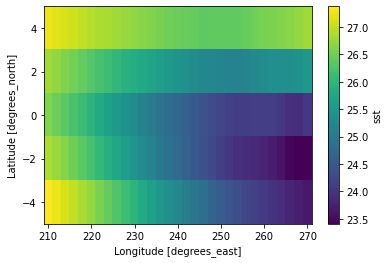

In [8]:
nino3_climate.plot()

In [9]:
nino3_anomaly

<xarray.DataArray 'sst' (time: 2009)>
array([-0.05856428,  0.59235644,  1.2705572 , ...,  1.0040078 ,
        1.2670056 ,  1.156409  ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-05-01

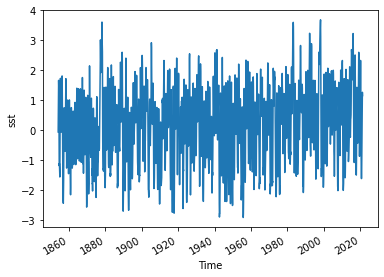

In [10]:
nino3_anomaly.plot()

In [11]:
nino3_climate=nino3_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino34_climate=nino34_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino4_climate=nino4_area.sel(time=slice('1950','1979')).groupby('time.month').mean()

In [12]:
nino3_climate

<xarray.DataArray 'sst' (month: 12, lat: 5, lon: 31)>
array([[[26.692535, 26.617573, 26.56557 , ..., 26.33375 , 26.48395 ,
         26.702868],
        [26.28767 , 26.190758, 26.10472 , ..., 25.548578, 25.713757,
         25.902689],
        [26.155382, 26.034817, 25.917652, ..., 24.51475 , 24.649958,
         24.857374],
        [26.450964, 26.321459, 26.192762, ..., 24.16702 , 24.263638,
         24.441313],
        [26.983564, 26.854012, 26.721563, ..., 24.429422, 24.518442,
         24.632893]],

       [[26.712063, 26.66136 , 26.621216, ..., 27.011635, 27.197338,
         27.455584],
        [26.343227, 26.280165, 26.21615 , ..., 26.585873, 26.678373,
         26.781492],
        [26.240967, 26.156654, 26.06723 , ..., 25.987204, 25.999979,
         26.06443 ],
        [26.565876, 26.471191, 26.374205, ..., 25.883657, 25.914913,
         26.030811],
        [27.123564, 27.023376, 26.917969, ..., 26.107542, 26.222853,
...
         26.097174],
        [26.620384, 26.49178 , 26.362455, ..., 24.492714, 24.619017,
         24.820112],
        [26.329546, 26.17118 , 26.01505 , ..., 22.64688 , 22.78101 ,
         23.083094],
        [26.56245 , 26.391792, 26.220911, ..., 21.772713, 21.804682,
         21.955727],
        [27.048466, 26.882534, 26.70966 , ..., 21.932129, 21.852787,
         21.767738]],

       [[26.918379, 26.82392 , 26.748375, ..., 25.970892, 26.071133,
         26.203587],
        [26.440897, 26.320738, 26.21206 , ..., 24.725546, 24.888172,
         25.100607],
        [26.256311, 26.111597, 25.971508, ..., 23.221136, 23.380789,
         23.659597],
        [26.536482, 26.38442 , 26.230488, ..., 22.608248, 22.688267,
         22.865856],
        [27.048615, 26.901337, 26.747215, ..., 22.852953, 22.860746,
         22.877632]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 4.0 2.0 0.0 -2.0 -4.0
  * lon      (lon) float32 210.0 212.0 214.0 216.0 ... 264.0 266.0 268.0 270.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

(array([ 23.,  45.,  92.,  93., 182., 190., 326., 450., 336., 123.]),
 array([20.767553, 21.502422, 22.23729 , 22.972158, 23.707026, 24.441895,
        25.176764, 25.91163 , 26.6465  , 27.381367, 28.116236],
       dtype=float32),
 <BarContainer object of 10 artists>)

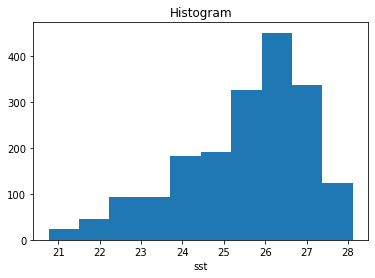

In [13]:
nino3_climate.plot()

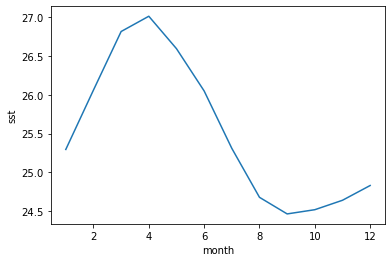

In [14]:
nino3_climate.mean(dim=['lon','lat']).plot()

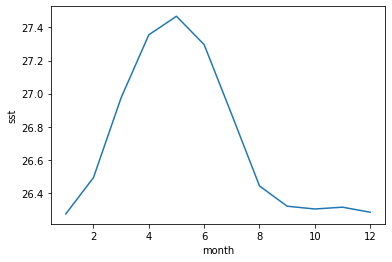

In [15]:
nino34_climate.mean(dim=['lon','lat']).plot()

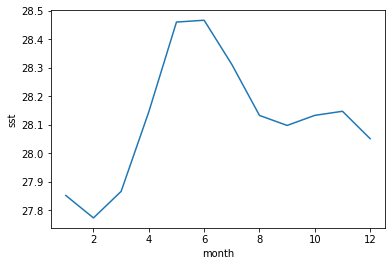

In [16]:
nino4_climate.mean(dim=['lon','lat']).plot()

In [17]:
nino3_anomaly=(nino3_area-nino3_climate).mean(dim='lat').mean(dim='lon')
nino34_anomaly=(nino34_area-nino34_climate).mean(dim='lat').mean(dim='lon')
nino4_anomaly=(nino4_area-nino4_climate).mean(dim='lat').mean(dim='lon')

In [18]:
nino3_anomaly

<xarray.DataArray 'sst' (time: 2009, month: 12)>
array([[ 0.1689924 , -0.59785515, -1.3538758 , ...,  0.94686854,
         0.82514113,  0.6344819 ],
       [ 0.81991315,  0.0530655 , -0.7029552 , ...,  1.5977893 ,
         1.4760618 ,  1.2854027 ],
       [ 1.4981138 ,  0.7312661 , -0.02475463, ...,  2.2759898 ,
         2.1542623 ,  1.9636031 ],
       ...,
       [ 1.2315644 ,  0.46471685, -0.29130384, ...,  2.0094407 ,
         1.8877132 ,  1.6970541 ],
       [ 1.4945623 ,  0.7277148 , -0.02830598, ...,  2.2724383 ,
         2.150711  ,  1.9600517 ],
       [ 1.3839656 ,  0.6171181 , -0.13890266, ...,  2.1618416 ,
         2.0401142 ,  1.8494551 ]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-05-01
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

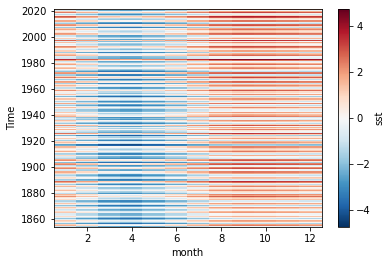

In [19]:
nino3_anomaly.plot()

In [20]:
nino34_anomaly

<xarray.DataArray 'sst' (time: 2009, month: 12)>
array([[-0.37482756, -0.59420377, -1.0775468 , ..., -0.40460813,
        -0.41549307, -0.3850576 ],
       [-0.21672615, -0.43610233, -0.91944546, ..., -0.2465067 ,
        -0.2573916 , -0.22695614],
       [ 0.6362152 ,  0.41683906, -0.06650402, ...,  0.6064347 ,
         0.59554976,  0.6259852 ],
       ...,
       [ 0.22675708,  0.00738093, -0.47596216, ...,  0.1969765 ,
         0.1860916 ,  0.21652709],
       [ 0.8397302 ,  0.62035406,  0.13701098, ...,  0.80994976,
         0.79906476,  0.8295002 ],
       [ 1.1760741 ,  0.956698  ,  0.47335494, ...,  1.1462935 ,
         1.1354086 ,  1.1658441 ]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-05-01
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [21]:
nino3_anomaly=(nino3_area.groupby('time.month')-nino3_climate).mean(dim='lat').mean(dim='lon')

In [22]:
nino3_anomaly

<xarray.DataArray 'sst' (time: 2009)>
array([ 0.1689924 ,  0.0530655 , -0.02475463, ..., -0.29130384,
       -0.22537749,  0.08262865], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-05-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 7 8 9 10 11 12 1 2 3 4 5

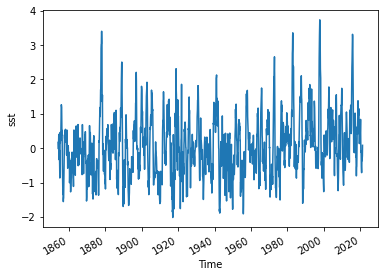

In [23]:
nino3_anomaly.plot()

In [24]:
nino34_anomaly=(nino34_area.groupby('time.month')-nino34_climate).mean(dim='lat').mean(dim='lon')
nino4_anomaly=(nino4_area.groupby('time.month')-nino4_climate).mean(dim='lat').mean(dim='lon')

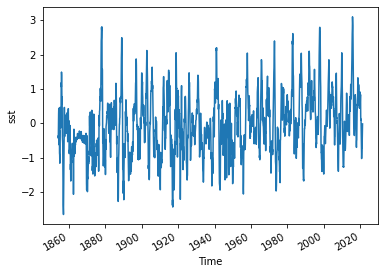

In [25]:
nino34_anomaly.plot()

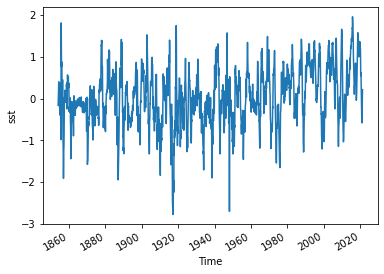

In [26]:
nino4_anomaly.plot()

In [27]:
nino3_anomaly.rolling(time=5).plot()

AttributeError: 'DataArrayRolling' object has no attribute 'plot'

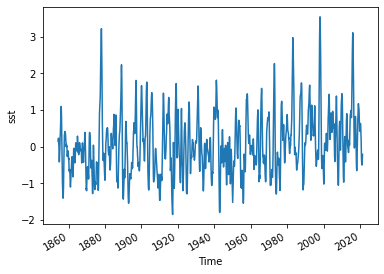

In [28]:
nino3_anomaly.rolling(time=5).mean().plot()

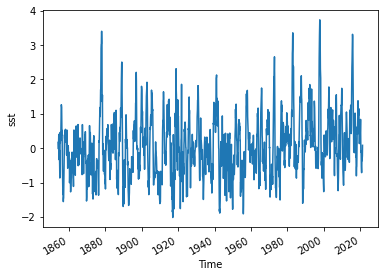

In [29]:
nino3_anomaly.plot()

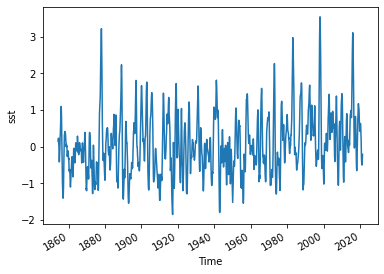

In [30]:
nino3_anomaly.rolling(time=5).mean().plot()

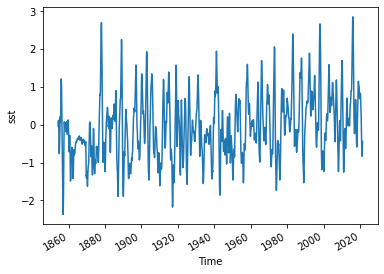

In [31]:
nino34_anomaly.rolling(time=5).mean().plot()

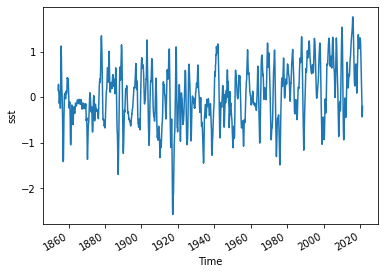

In [32]:
nino4_anomaly.rolling(time=5).mean().plot()

In [33]:
nino3_std=nino3_area.sel(time=slice('1950-01','1979-12')).std()
nino34_std=nino34_area.sel(time=slice('1950-01','1979-12')).std()
nino4_std=nino4_area.sel(time=slice('1950-01','1979-12')).std()

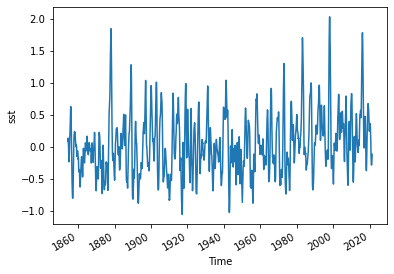

In [34]:
(nino3_anomaly.rolling(time=5).mean()/nino3_std).plot()

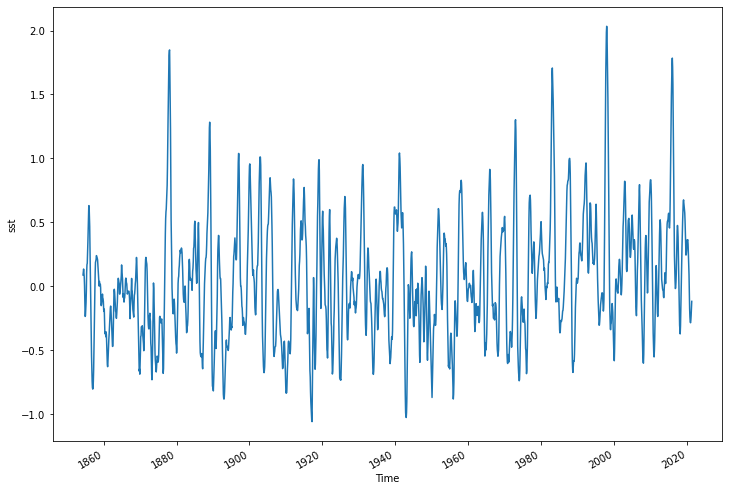

In [35]:
(nino3_anomaly.rolling(time=5).mean()/nino3_std).plot(size=8)

In [36]:
nino3_std

<xarray.DataArray 'sst' ()>
array(1.74400198)

In [37]:
nino34_std

<xarray.DataArray 'sst' ()>
array(1.36832952)

In [38]:
nino4_std

<xarray.DataArray 'sst' ()>
array(0.97664434)

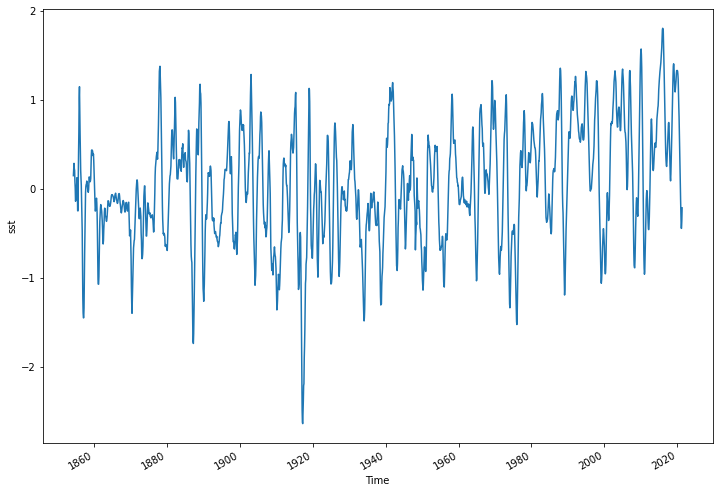

In [39]:
(nino4_anomaly.rolling(time=5).mean()/nino4_std).plot(size=8)

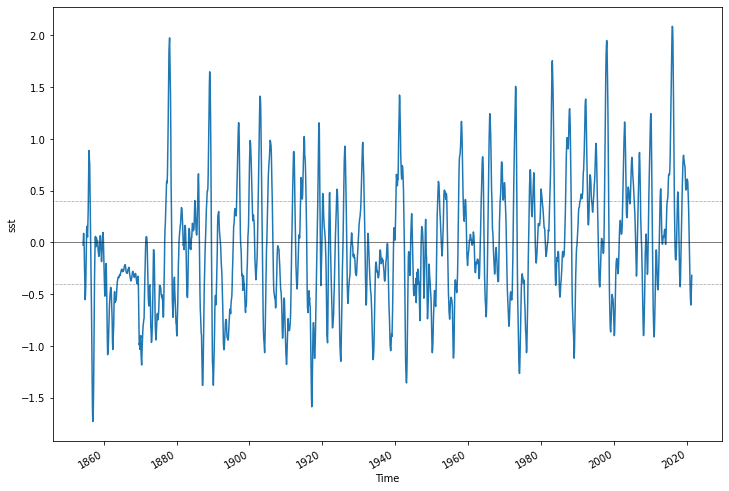

In [40]:
(nino34_anomaly.rolling(time=5).mean()/nino34_std).plot(size=8)
plt.axhline(0,color='black',lw=0.5)
plt.axhline(0.4,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-0.4,color='black',linewidth=0.5,linestyle='dotted')

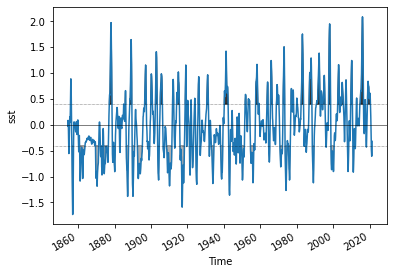

In [41]:
tmp=(nino34_anomaly.rolling(time=5).mean()/nino34_std)
plt.fill_between(tmp.time.values, tmp.where(tmp>=0.4).values, 0.4, color='black', alpha=0.8)
plt.fill_between(tmp.time.values, tmp.where(tmp<=-0.4).values, -0.4, color='black', alpha=0.3)
tmp.plot()
plt.axhline(0,color='black',lw=0.5)
plt.axhline(0.4,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-0.4,color='black',linewidth=0.5,linestyle='dotted')

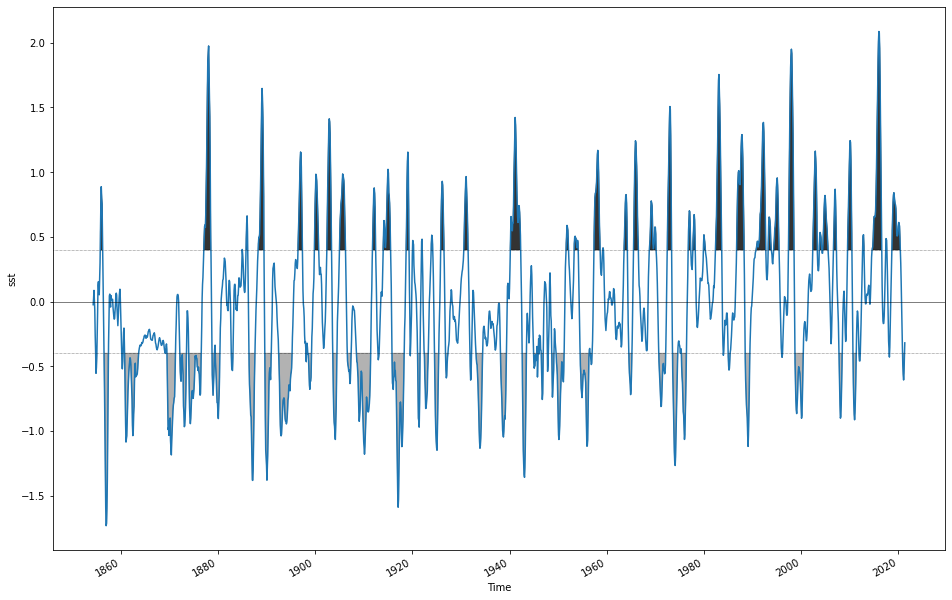

In [42]:
fig = plt.figure(figsize=(16, 10))
plt.fill_between(tmp.time.values, tmp.where(tmp>=0.4).values, 0.4, color='black', alpha=0.8)
plt.fill_between(tmp.time.values, tmp.where(tmp<=-0.4).values, -0.4, color='black', alpha=0.3)
tmp.plot()
plt.axhline(0,color='black',lw=0.5)
plt.axhline(0.4,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-0.4,color='black',linewidth=0.5,linestyle='dotted')

In [43]:
nino3_anomaly

<xarray.DataArray 'sst' (time: 2009)>
array([ 0.1689924 ,  0.0530655 , -0.02475463, ..., -0.29130384,
       -0.22537749,  0.08262865], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-05-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 7 8 9 10 11 12 1 2 3 4 5

In [44]:
if nino3_anomaly*nino4_anomaly>0:
    nct=nino3_anomaly-0.4*nino4_anomaly
    nwp=nino4_anomaly-0.4*nino4_anomaly
else:
    nct=nino3_anomaly
    nwp=nino4_anomaly

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [45]:
nino4_anomaly

<xarray.DataArray 'sst' (time: 2009)>
array([-0.16191188, -0.00754341,  0.2305003 , ..., -0.18534374,
        0.05518752,  0.21350965], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-05-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 7 8 9 10 11 12 1 2 3 4 5

In [46]:
if nino3_anomaly.groupby('time')*nino4_anomaly.groupby('time')>0:
    nct=nino3_anomaly-0.4*nino4_anomaly
    nwp=nino4_anomaly-0.4*nino4_anomaly
else:
    nct=nino3_anomaly
    nwp=nino4_anomaly

TypeError: GroupBy objects only support binary ops when the other argument is a Dataset or DataArray

In [47]:
nct

NameError: name 'nct' is not defined

In [48]:
nct=nino3_anomaly-a*nino4_anomaly

NameError: name 'a' is not defined

In [49]:
nino3_anomaly-nino4_anomaly

<xarray.DataArray 'sst' (time: 2009)>
array([ 0.33090428,  0.06060891, -0.25525492, ..., -0.1059601 ,
       -0.280565  , -0.13088101], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-05-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 7 8 9 10 11 12 1 2 3 4 5

In [50]:
a=nino3_anomaly*nino4_anomaly

In [51]:
a

<xarray.DataArray 'sst' (time: 2009)>
array([-0.02736188, -0.00040029, -0.00570595, ...,  0.05399134,
       -0.01243802,  0.01764201], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-05-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 7 8 9 10 11 12 1 2 3 4 5

In [52]:
product=nino3_anomaly*nino4_anomaly
product

<xarray.DataArray 'sst' (time: 2009)>
array([-0.02736188, -0.00040029, -0.00570595, ...,  0.05399134,
       -0.01243802,  0.01764201], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-05-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 7 8 9 10 11 12 1 2 3 4 5

In [53]:
if product>0:
    nct=nino3_anomaly-0.4*nino4_anomaly
    nwp=nino4_anomaly-0.4*nino4_anomaly
else:
    nct=nino3_anomaly
    nwp=nino4_anomaly

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [54]:
nct=(nino3_anomaly-0.4*nino4_anomaly).where(product>0)

In [55]:
nct

<xarray.DataArray 'sst' (time: 2009)>
array([        nan,         nan,         nan, ..., -0.21716633,
               nan, -0.00277521], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-05-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 7 8 9 10 11 12 1 2 3 4 5

In [56]:
nct=nino3_anomaly.where(product<=0)

In [57]:
nct

<xarray.DataArray 'sst' (time: 2009)>
array([ 0.1689924 ,  0.0530655 , -0.02475463, ...,         nan,
       -0.22537749,         nan], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-05-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 7 8 9 10 11 12 1 2 3 4 5

In [58]:
nct=(nino3_anomaly-0.4*nino4_anomaly).where(product>0)&nino3_anomaly.where(product<=0)

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [59]:
nct=(nino3_anomaly-0.4*nino4_anomaly).where(product>0)&(nino3_anomaly).where(product<=0)

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [1]:
a

NameError: name 'a' is not defined

In [2]:
a

NameError: name 'a' is not defined

In [3]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
ds=xr.open_dataset('/home/563/lx7831/ncfile/sst.mnmean.nc')
ds
sst=ds.sst
nino3_area=sst.sel(lat=slice(5,-5),lon=slice(210,270))
nino34_area=sst.sel(lat=slice(5,-5),lon=slice(190,240))
nino4_area=sst.sel(lat=slice(5,-5),lon=slice(160,210))
nino3_climate=nino3_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino34_climate=nino34_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino4_climate=nino4_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino3_anomaly=(nino3_area.groupby('time.month')-nino3_climate).mean(dim='lat').mean(dim='lon')
nino34_anomaly=(nino34_area.groupby('time.month')-nino34_climate).mean(dim='lat').mean(dim='lon')
nino4_anomaly=(nino4_area.groupby('time.month')-nino4_climate).mean(dim='lat').mean(dim='lon')
nino3_std=nino3_area.sel(time=slice('1950-01','1979-12')).std()
nino34_std=nino34_area.sel(time=slice('1950-01','1979-12')).std()
nino4_std=nino4_area.sel(time=slice('1950-01','1979-12')).std()
tmp=(nino34_anomaly.rolling(time=5).mean()/nino34_std)
a=nino3_anomaly*nino4_anomaly
product=nino3_anomaly*nino4_anomaly


In [4]:
ds

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, nbnds: 2, time: 2009)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-05-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2021-06-05

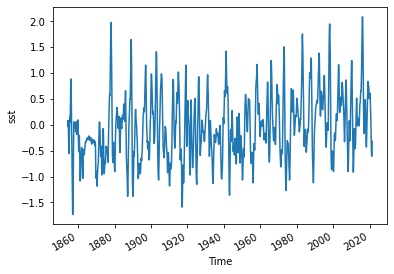

In [5]:
tmp.plot()

In [6]:
nino3_anomaly

<xarray.DataArray 'sst' (time: 2009)>
array([ 0.1689924 ,  0.0530655 , -0.02475463, ..., -0.29130384,
       -0.22537749,  0.08262865], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-05-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 7 8 9 10 11 12 1 2 3 4 5

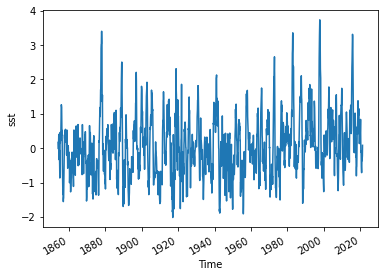

In [7]:
nino3_anomaly.plot()

In [8]:
nino3_indices=(nino3_anomaly.rolling(time=5).mean())/nino3_std
nino4_indices=(nino4_anomaly.rolling(time=5).mean())/nino4_std

In [9]:
nino3_indices

<xarray.DataArray 'sst' (time: 2009)>
array([        nan,         nan,         nan, ..., -0.23020704,
       -0.17432574, -0.11900894])
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2021-05-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 7 8 9 10 11 12 1 2 3 4 5

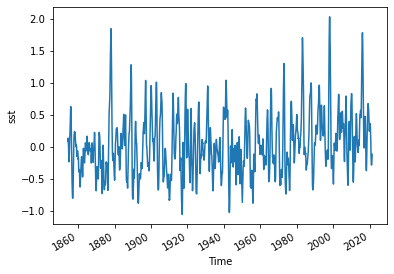

In [10]:
nino3_indices.plot()

In [11]:
nino3_index=(nino3_anomaly.rolling(time=5).mean())/nino3_std
nino4_index=(nino4_anomaly.rolling(time=5).mean())/nino4_std

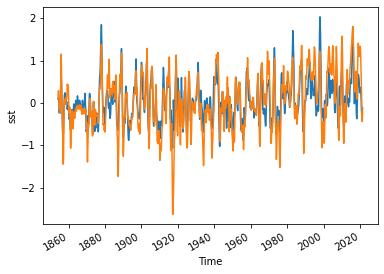

In [12]:
nino3_index.plot()
nino4_index.plot()

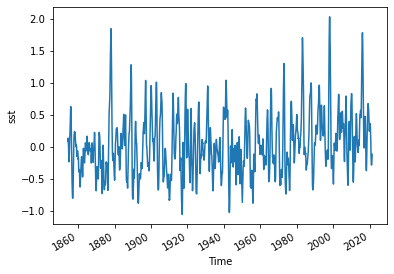

In [13]:
nino3_index.plot()

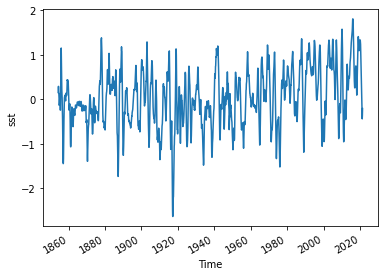

In [14]:
nino4_index.plot()

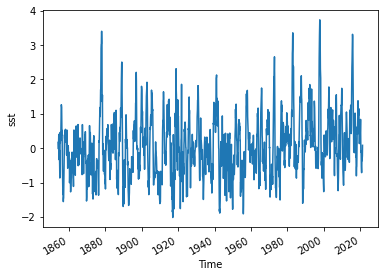

In [15]:
nino3_anomaly.plot()

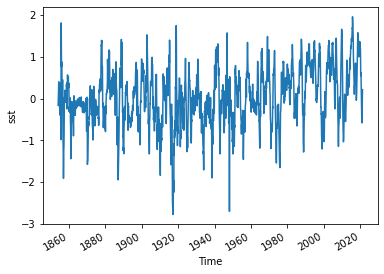

In [16]:
nino4_anomaly.plot()

In [17]:
alpha=xarray.where(nino3_index*nino4_index>0,0.4,0)

NameError: name 'xarray' is not defined

In [18]:
alpha=xr.where(nino3_index*nino4_index>0,0.4,0)

In [19]:
nct=nino3_index-alpha*nino4_index

In [20]:
nwp=nino4_index-alpha*nino3_index

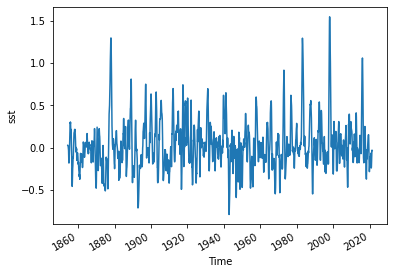

In [21]:
nct.plot()

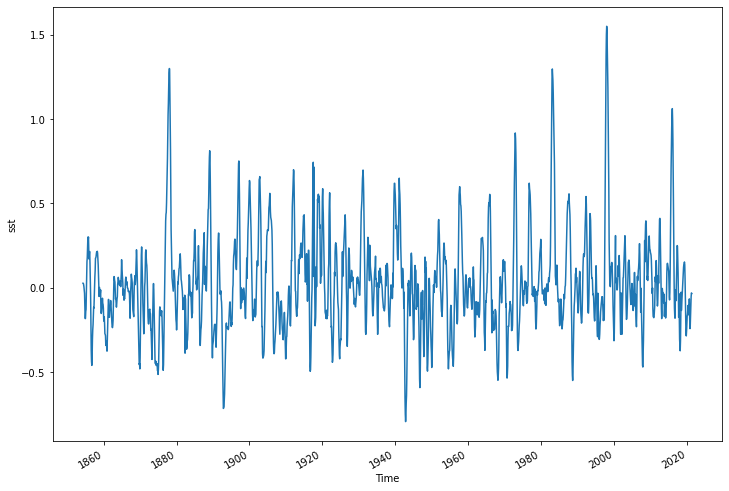

In [22]:
nct.plot(size=8)

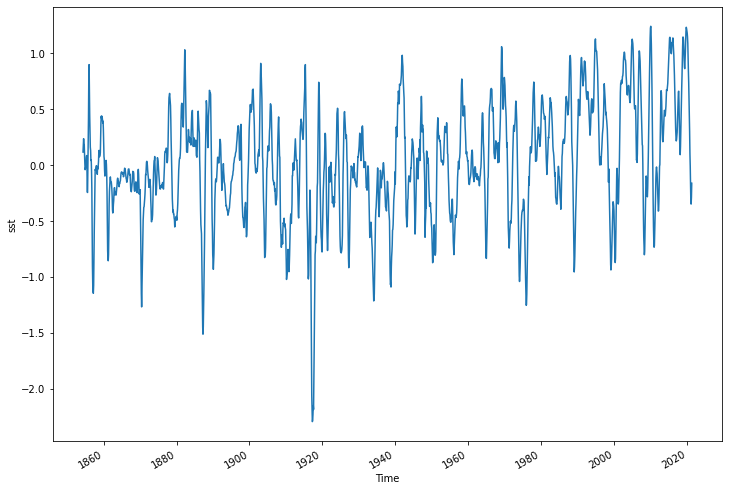

In [23]:
nwp.plot(size=8)

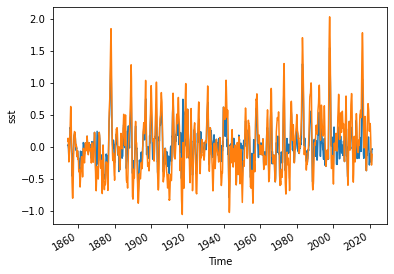

In [24]:
nct.plot()
nino3_index.plot()

In [1]:
nino3_anomaly

NameError: name 'nino3_anomaly' is not defined

In [2]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
ds=xr.open_dataset('/home/563/lx7831/ncfile/sst.mnmean.nc')
ds
sst=ds.sst
nino3_area=sst.sel(lat=slice(5,-5),lon=slice(210,270))
nino34_area=sst.sel(lat=slice(5,-5),lon=slice(190,240))
nino4_area=sst.sel(lat=slice(5,-5),lon=slice(160,210))
nino3_climate=nino3_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino34_climate=nino34_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino4_climate=nino4_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino3_anomaly=(nino3_area.groupby('time.month')-nino3_climate).mean(dim='lat').mean(dim='lon')
nino34_anomaly=(nino34_area.groupby('time.month')-nino34_climate).mean(dim='lat').mean(dim='lon')
nino4_anomaly=(nino4_area.groupby('time.month')-nino4_climate).mean(dim='lat').mean(dim='lon')
nino3_std=nino3_area.sel(time=slice('1950-01','1979-12')).std()
nino34_std=nino34_area.sel(time=slice('1950-01','1979-12')).std()
nino4_std=nino4_area.sel(time=slice('1950-01','1979-12')).std()
tmp=(nino34_anomaly.rolling(time=5).mean()/nino34_std)
a=nino3_anomaly*nino4_anomaly
product=nino3_anomaly*nino4_anomaly

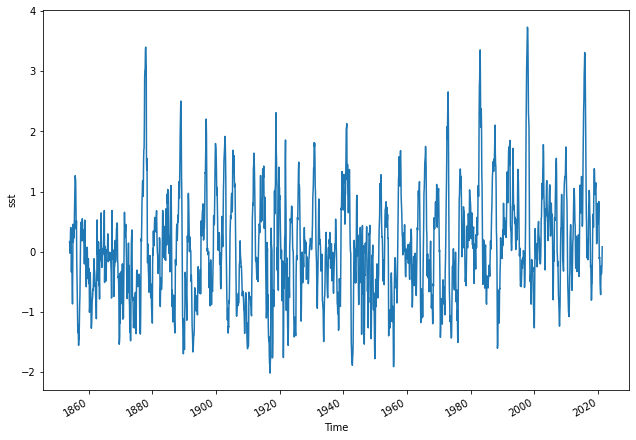

In [3]:
nino3_anomaly.plot(size=7)

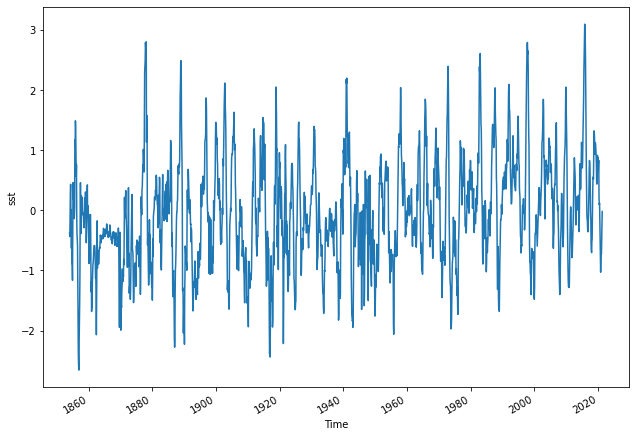

In [4]:
nino34_anomaly.plot(size=7)

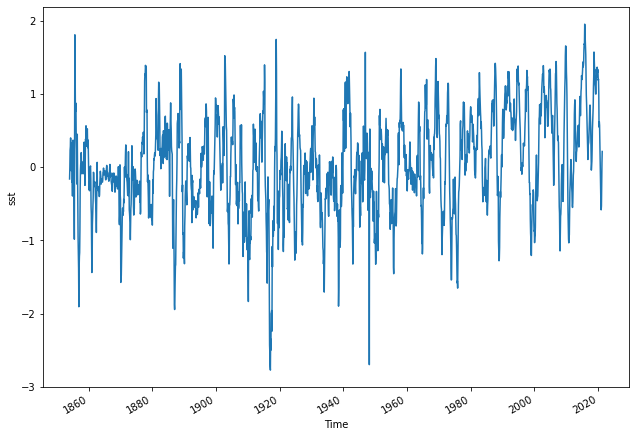

In [5]:
nino4_anomaly.plot(size=7)

In [6]:
alpha=xr.where(nino3_anomaly*nino4_anomaly>0,0.4,0)
nct=nino3_anomaly-alpha*nino4_anomaly
nwp=nino4_anomaly-alpha*nino3_anomaly

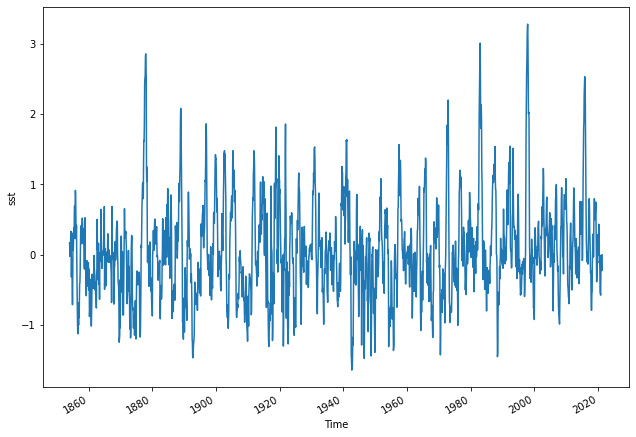

In [7]:
nct.plot(size=7)

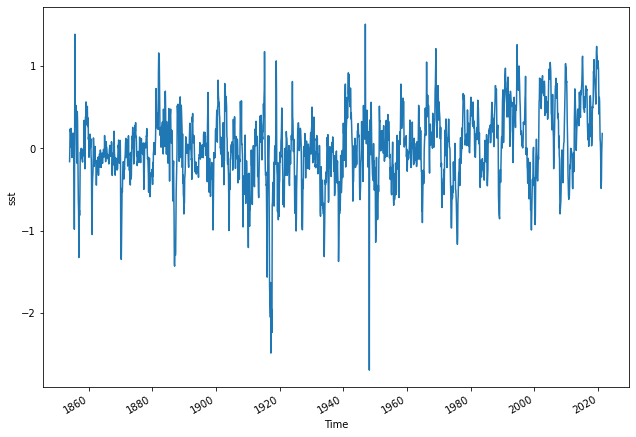

In [8]:
nwp.plot(size=7)

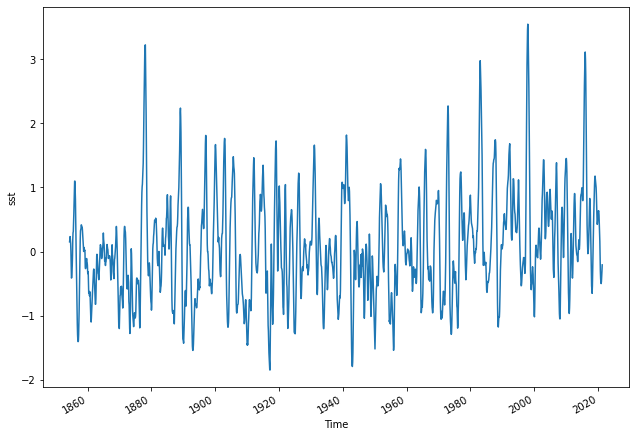

In [9]:
nino3_anomaly.rolling(time=5).mean().plot(size=7)

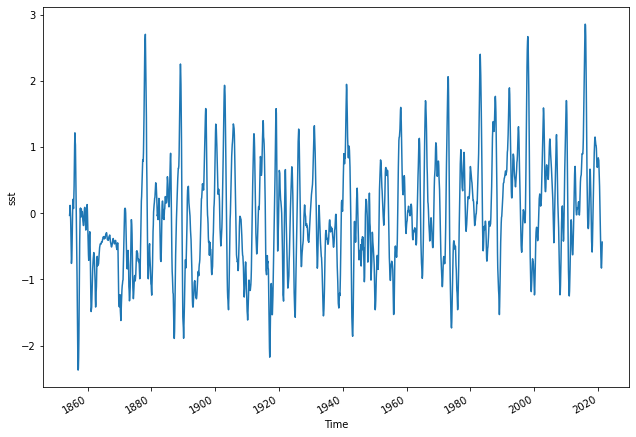

In [10]:
nino34_anomaly.rolling(time=5).mean().plot(size=7)

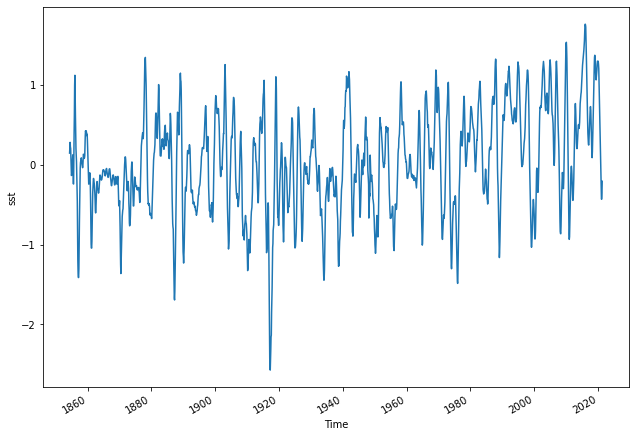

In [11]:
nino4_anomaly.rolling(time=5).mean().plot(size=7)

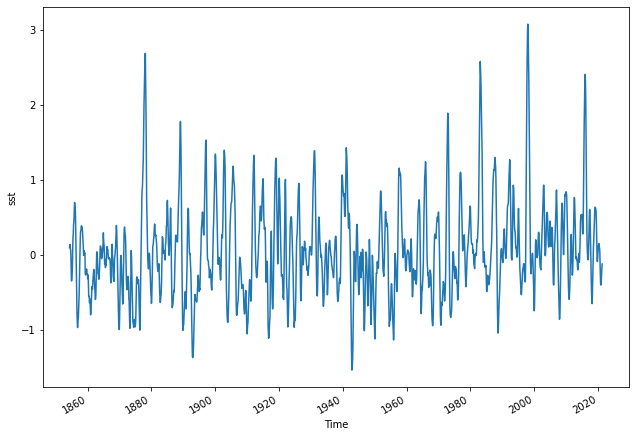

In [12]:
nct.rolling(time=5).mean().plot(size=7)

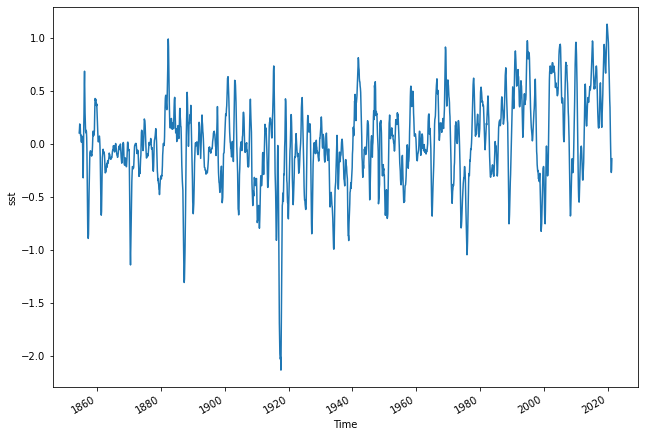

In [13]:
nwp.rolling(time=5).mean().plot(size=7)